# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.stats import weightstats as stests

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

##### graphical method

C:\Users\Leo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


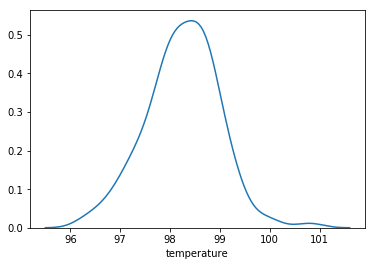

In [3]:
sns.distplot(df['temperature'], hist=False)

The density plot of the body temperature is a nice bell curve with no obvious outliers, it is relatively normal. Let's verify it by creating a normal density curve which has the same mean and standard deviation of the body temperature data and see how the two curves align. 

In [4]:
## define the ecdf curve function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / n
    return x, y

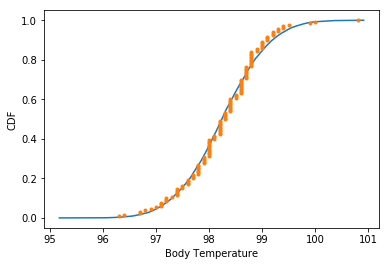

In [19]:
sample_temp = df['temperature']
mu = np.mean(sample_temp)
std = np.std(sample_temp)

##sample out a normal distribution with this mean and std
samples = np.random.normal(mu, std, size=10000)

##get the cdf of the samples and of the data
x_sample, y_sample = ecdf(samples)
x, y = ecdf(sample_temp)

##plot the CDFs
_ = plt.plot(x_sample, y_sample)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')
plt.show()

The body temperature aligns well with the simulated normal density curve, and is relatively normal. 

### 2. Is the sample size large? Are the observations independent?

In [29]:
## samples size
size = len(df)
print("The dataset has " + str(size) + " data points.")

The dataset has 130 data points.


The dataset has 130 data points (>30) and each individuals body temperature is not affected by those of others. In this case, the sample size is large enough and the observations are independent. 

### 3. Is the true population mean really 98.6 degrees F?

##### bootstrap hypothesis test

In [23]:
## shift the sample mean to be 98.6
temp_shifted = sample_temp + (98.6 - mu)
## bootstrap 10000 samples
def draw_bs_reps(data, func, size=1):
    bs_reps = np.empty(size)
    
    for i in range(size):
        bs_samples = np.random.choice(data, len(data))
        bs_reps[i] = func(bs_samples)
    return bs_reps

bs_replicates = draw_bs_reps(temp_shifted, np.mean, 10000)

## probability of getting mean as least as small as mu, assuming the real population mean is 98.6
p = np.sum(bs_replicates <= mu)/len(bs_replicates)
print("sample mean: ", mu)
print("p-value: ", p)

sample mean:  98.24923076923078
p-value:  0.0


The probability for getting a sample mean of body temperature of 98.24 is 0.0% assuming the true population mean is 98.6 degrees F. Thus we can reject the null hypothesis and conclude that the true population mean is less than 98.6 degrees F. 

##### frequentist statistical testing

Null Hypothesis: The true population mean of body temperature is 98.24 degrees F.    
Alternative Hypothesis: The true population mean of body temperature is less than 98.24 degrees F.     
  
I would use a one-sample test since we are comparing the sample mean against the population mean and not the difference between 2 different sample means.   

Also, z statistics are appropriate in this case since the sample size is bigger than 30 and the distribution of the sample mean is normally distributed under central limited theorem. 

In [27]:
testResult = stests.ztest(sample_temp, value=98.6)
print("z-stat: ", testResult[0])
print("p-value: ", testResult[1])

z-stat:  -5.4548232923645195
p-value:  4.9021570141012155e-08


The z-stat test gave a p-value very close to 0% as well. 

##### confidence intervals

In [29]:
## bootstrap replicates of the mean
bs_replicates = draw_bs_reps(sample_temp, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, ' degrees F.')

95% confidence interval = [98.12307692 98.37538462]  degrees F.


The assumed true population mean of 98.6 degrees F is not in the 95% confidence interval of the sample data. Thus, we can also conclude that the true population mean is not 98.6. 

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

In [36]:
sample_10 = np.random.choice(sample_temp, 10)
print(sample_10)

[98.  99.1 98.4 98.8 97.8 98.  97.8 98.2 98.6 97.9]


In [37]:
## z-stats
testResult_10z = stests.ztest(sample_10, value=98.6)
print("z-stat: ", testResult_10z[0])
print("p-value_z_stat: ", testResult_10z[1])

## t-stats
testResult_10t = stats.ttest_1samp(sample_10, popmean=98.6)
print("t-stat: ", testResult_10t[0])
print("p-value_t_stat: ", testResult_10t[1])

z-stat:  -2.388293819533353
p-value_z_stat:  0.016926803091935057
t-stat:  -2.3882938195333527
p-value_t_stat:  0.04067098566525225


When the sample size is less than 30, it is more appropriate to use the t-stats since the sampling distribution of mean may not be normally distributed. We can notice that in this case, t-stat gives a higher p-value than z-stat and it is less likely to reject the null hypothesis test. When small samples are present, t-stat is safer than z-stat. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

We'll calculate the 95% confidence interval for the mean temperature, and everything out of this range will be considered abnormal

##### bootstrapping

From the above bootstrapping, we know that the 95% confidence interval for the population mean is [98.12307692 98.37538462]  degrees F. The mean body temperature that are below 98.12 or above 98.38 will be considered abnormal. 

##### frequentist statistical testing

In [49]:
sem = stats.sem(sample_temp)
print('standard error of the mean: ', sem)
conf_int_s = stats.norm.interval(0.95, loc=mu, scale=sem)
print('confidence interval: ', conf_int_s)

standard error of the mean:  0.06430441683789102
confidence interval:  (98.12319642818166, 98.3752651102799)


### 6. Is there a significant difference between males and females in normal temperature?

##### graphical impression

C:\Users\Leo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


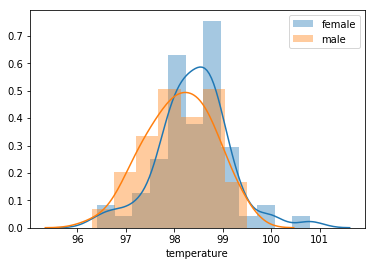

In [76]:
sns.distplot(female_temp)
sns.distplot(male_temp)
plt.legend(['female', 'male'])

By looking at the distribution, it seems that females tend to have a higher body temperature than males. 

##### hypothesis testing

H0: there is no difference between males and females in normal temperature   
HA: females have higher body temperature than males   
significance level: 0.05

I will use a two-sample bootstrap hypothesis test to test the difference of mean. 

In [56]:
## subset df into female and male
male_temp = df[df['gender']=='M']['temperature']
female_temp = df[df['gender']=='F']['temperature']

In [69]:
mu_m = np.mean(male_temp)
mu_f = np.mean(female_temp)
mu_diff = mu_f - mu_m
print('male mean: ', mu_m)
print('female mean: ', mu_f)
print('difference between female and male mean temperature: ', mu_diff)

male mean:  98.1046153846154
female mean:  98.39384615384613
difference between female and male mean temperature:  0.289230769230727


In [70]:
## shift both male and female dataset to have the same mean
male_shifted = male_temp + (mu -mu_m)
female_shifted = female_temp + (mu - mu_f)

## compute 10000 bootstrap replicates from shifted dataset
bs_replicates_male = draw_bs_reps(male_shifted, np.mean, 10000)
bs_replicates_female = draw_bs_reps(female_shfited, np.mean, 10000)

## get replicates of difference of means
bs_replicates_diff = bs_replicates_female - bs_replicates_male

## compute p-value for getting a difference 
p = np.sum(bs_replicates_diff >= mu_diff)/len(bs_replicates_diff)
print('p-value: ', p)

p-value:  0.0117


The p-value of 0.0117 is less than our significance level of 0.05. Thus we can reject the null hypothesis and conclude that females tend to have higher body temperature than males. 